<a href="https://colab.research.google.com/github/sdfjslfjafkdl/Deep-Learning-Base-5/blob/main/step03/step03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 불러오기

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## 넘파이와 다차원 배열

### 넘파이의 다차원 배열

In [3]:
x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [4]:
W = np.array([[1, 2, 3,],
              [4, 5, 6]])

print(W.ndim)
print(W.shape)

2
(2, 3)


### 원소별 연산

In [5]:
W = np.array([[1, 2, 3],
              [4, 5, 6]])
X = np.array([[0, 1, 2],
              [3, 4, 5]])

print(W + X)
print('---')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


### 벡터의 내적과 행렬 곱
- n행 m열의 내적 결과가 새롭게 만들어지는 행렬의 n행 m열 위치의 원소가 됨
- np.dot 대신 @ 연산자 사용해도 내적 / 행렬 곱 연산 가능

In [7]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)

32


In [8]:
# 행렬 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)

[[19 22]
 [43 50]]


## 다변량 정규 분포

### 다변량 정규 분포 공식

In [9]:
# 벡터의 전치
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


In [10]:
# 행렬식
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


In [13]:
# 역행렬
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)

print(B)
print('---')
print((A @ B).astype(int))

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[1 0]
 [0 1]]


### 다변량 정규 분포 구현

In [14]:
def multivariate_normal(x, mu, cov): # x: (1, D) 또는 (D,) mu: (1, D) 또는 (D,) cov: (D, D)
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  D = len(x)
  z = 1 / np.sqrt(((2 * np.pi) ** D) * det) # 행렬과 스칼라의 곱
  y = z * np.exp(((x - mu).T) @ inv @ (x - mu) / -2.0) # 행렬곱
  return y

In [16]:
x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

0.013064233284684921


## 2차원 정규 분포 시각화

### 3D 그래프 그리기

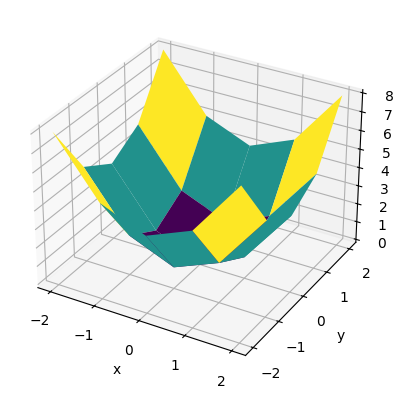

In [18]:
X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d') # 3d 그래프 설정
ax.plot_surface(X, Y, Z, cmap='viridis') # viridis 라는 컬러맵 사용
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

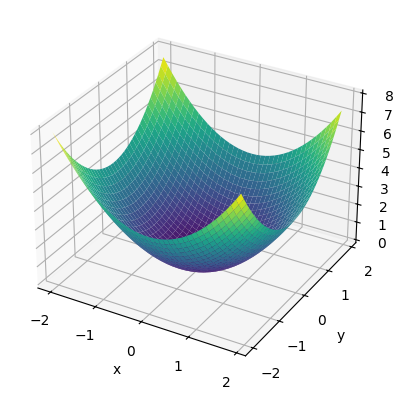

In [19]:
# np.meshgrid를 사용하여 격자점 간격이 더 세밀한 부드러운 그래프 만들기
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 등고선 그리기

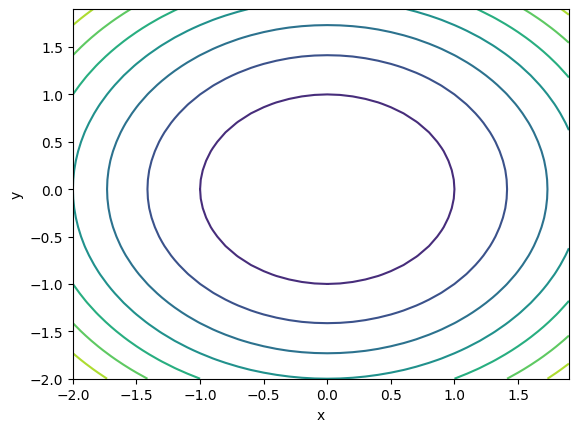

In [20]:
# plt의 contour 함수 사용
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 2차원 정규 분포 그래프

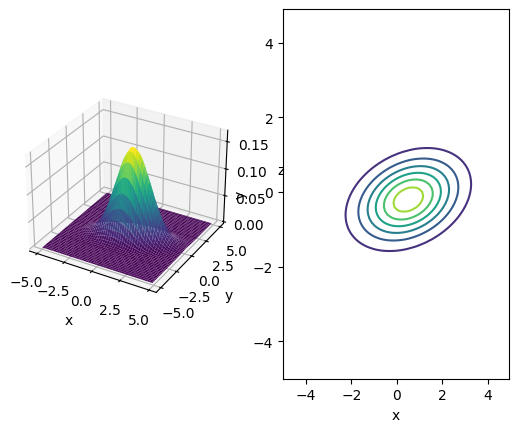

In [25]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]]) # X와 Y의 [i, j] 번째 원소를 가지는 벡터 x_ij
    Z[i, j] = multivariate_normal(x, mu, cov) # x_ij에 대한 정규분포값

fig = plt.figure()
# 3d graph
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
# contour line
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)

plt.show()

#### 공분산 행렬에 따른 등고선의 차이

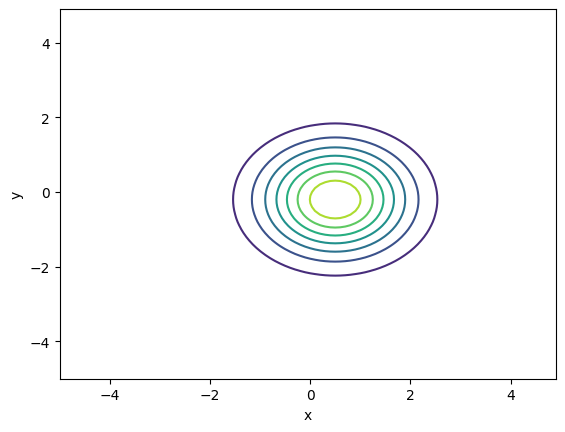

In [26]:
# 공분산이 0이면 두 변수는 관련이 없음
mu = np.array([0.5, -0.2])
cov = np.array([[1.0, 0.0], [0.0, 1.0]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]]) # X와 Y의 [i, j] 번째 원소를 가지는 벡터 x_ij
    Z[i, j] = multivariate_normal(x, mu, cov) # x_ij에 대한 정규분포값

ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z)

plt.show()

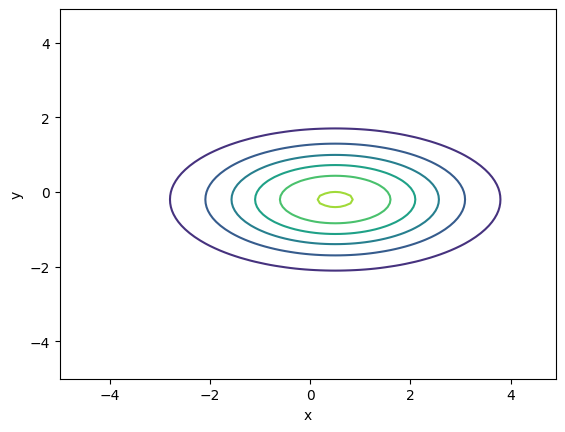

In [27]:
# 공분산행렬의 대각선 원소(분산)가 크면 분포가 그 축을 따라 넓게 퍼짐
mu = np.array([0.5, -0.2])
cov = np.array([[3.0, 0.0], [0.0, 1.0]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]]) # X와 Y의 [i, j] 번째 원소를 가지는 벡터 x_ij
    Z[i, j] = multivariate_normal(x, mu, cov) # x_ij에 대한 정규분포값

ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z)

plt.show()

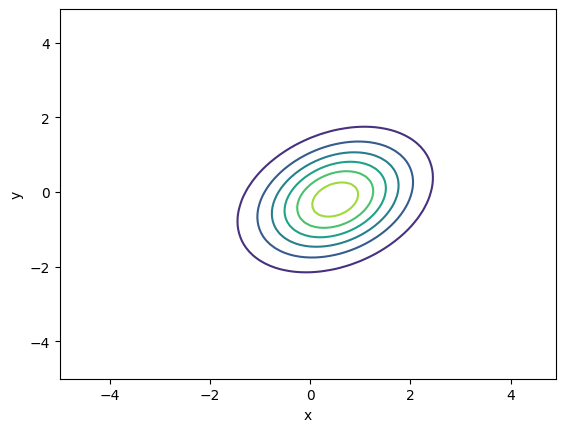

In [28]:
# 비대각선 원소(공분산)가 양수면 분포가 y = x 선을 따라 기울어짐. 두 변수는 양의 상관관계가 있다(현재 예시에서는 x, y 2개의 변수만 있음)
mu = np.array([0.5, -0.2])
cov = np.array([[1.0, 0.3], [0.3, 1.0]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]]) # X와 Y의 [i, j] 번째 원소를 가지는 벡터 x_ij
    Z[i, j] = multivariate_normal(x, mu, cov) # x_ij에 대한 정규분포값

ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z)

plt.show()

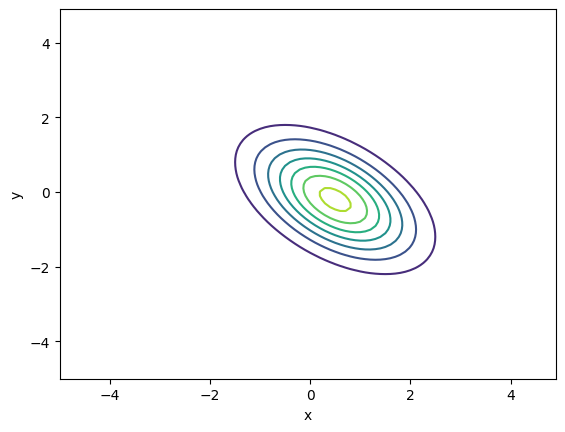

In [29]:
# 비대각선 원소의 값이 음수면 분포가 y = -x 선을 따라 기울어지며 음의 상관관계가 있음
mu = np.array([0.5, -0.2])
cov = np.array([[1.0, -0.5], [-0.5, 1.0]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]]) # X와 Y의 [i, j] 번째 원소를 가지는 벡터 x_ij
    Z[i, j] = multivariate_normal(x, mu, cov) # x_ij에 대한 정규분포값

ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z)

plt.show()

## 다변량 정규 분포의 최대 가능도 추정

### 최대 가능도 추정 구현

In [30]:
np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D) # 균등분포로 부터 더미 데이터 생성. N행 D열

mu = np.mean(xs, axis = 0) # 0번째 축을 따라 평균 계산 -> 촤대 가능도를 나오게 하는 mu값의 공식은 평균과 같음
cov = np.cov(xs, rowvar=False) # rowvar=False -> 각 행을 하나의 데이터로 취급하여 공분산 행렬 계산 / 촤대 가능도를 나오게 하는 mu값의 공식은 공분산 행렬 구하기와 같음

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


### 실제 데이터 사용

In [31]:
xs = np.loadtxt('height_weight.txt')

In [32]:
xs.shape # 25000행 2열

(25000, 2)

In [33]:
small_xs = xs[:500] # 2만 5천개 데이터 중에서 처음 500개만 사용하기

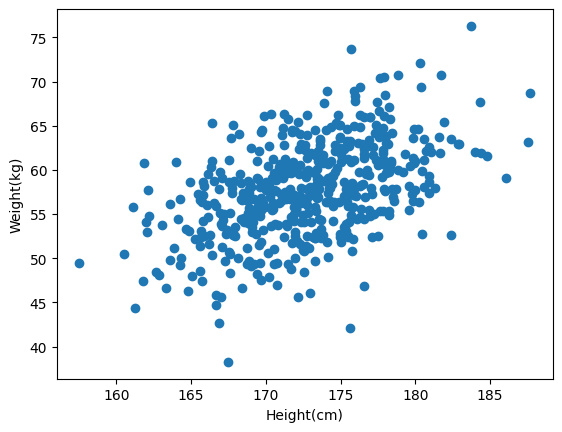

In [34]:
# 산점도로 데이터 시각화해보기
plt.scatter(small_xs[:, 0], small_xs[:, 1]) # 산점도 그리기
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()
# 키와 몸무게는 상관이 있는 분포임을 알 수 있음. 2차원 정규분포로 표현할 수 있을 것 같음(모델링)

In [35]:
# 최대 가능도 추정 수행
mu = np.mean(xs, axis = 0)
cov = np.cov(xs, rowvar=False)

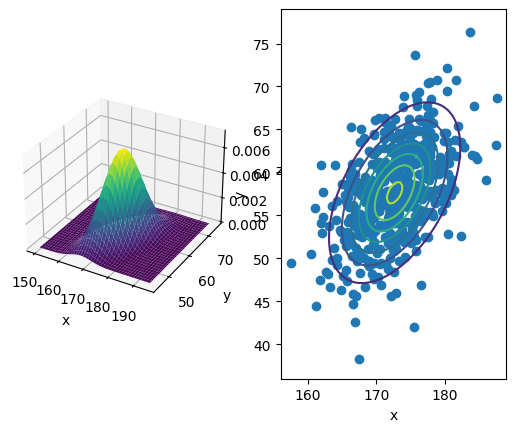

In [36]:
# 모델링 -> 매개변수 추정(최대 가능도 추정)까지 했으니, 임의의 데이터를 생성해 정규 분포 및 등고선 그려봐서 원래 데이터에 잘 들어맞는지 확인하기(산점도 그려서 분포가 비슷한지 확인)
small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x = np.array([X[i, j], Y[i, j]])
    Z[i, j] = multivariate_normal(x, mu, cov) # 최대 가능도 추정으로 구한 x_ij에 대한 정규분포값

fig = plt.figure()
# 3d graph
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
# contour line
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)

plt.show()